## Adapting Stackix to work with unpaired Miracle data

In [1]:
import autoencodix as acx
import os
from autoencodix.configs.stackix_config import StackixConfig
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
os.chdir("..")
os.getcwd()


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/maximilianjoas/development/autoencodix_package'

In [2]:
import os

root_dir = os.path.join("data/miracle/Daten/Relevanten")
rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet" # TODO test with non filtered version including nans
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"
clin_file_nas = "2025-05-16_RESTING_clinical.parquet"

rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet"
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"

# Create a dictionary of DataInfo objects
data_info = {
    "RNA": DataInfo(file_path=os.path.join(root_dir, rna_file)),
    "clinical": DataInfo(file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"),
    "mutation": DataInfo(file_path=os.path.join(root_dir, mut_file)),
    "radiology": DataInfo(file_path=os.path.join(root_dir, radio_con)),
    "cell_deconvolution": DataInfo(file_path=os.path.join(root_dir, cell_deco))
}

config = StackixConfig(
    data_config=DataConfig(
        data_info=data_info
    ),
    data_case=DataCase.MULTI_BULK,
    requires_paired=False,
    epochs = 100
)

stackix = acx.Stackix(config=config)

In [3]:
stackix.run()

preprocessing


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 56 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_005', 'RESTING_008', 'RESTING_012', 'RESTING_013', 'RESTING_014', 'RESTING_018', 'RESTING_027', 'RESTING_028', 'RESTING_029', 'RESTING_030', 'RESTING_031', 'RESTING_036', 'RESTING_040', 'RESTING_047', 'RESTING_050', 'RESTING_060', 'RESTING_062', 'RESTING_066', 'RESTING_067', 'RESTING_068', 'RESTING_090', 'RESTING_091', 'RESTING_106', 'RESTING_107', 'RESTING_112', 'RESTING_114', 'RESTING_119', 'RESTING_127', 'RESTING_128', 'RESTING_129', 'RESTING_137', 'RESTING_140', 'RESTING_141', 'RESTING_143', 'RESTING_146', 'RESTING_149', 'RESTING_158', 'RESTING_162', 'RESTING_171', 'RESTING_174', 'RESTING_179', 'RESTING_181', 'RESTING_184', 'RESTING_185', 'RESTING_187', 'RESTING_207', 'RESTING_215', 'RESTING_226', 'RESTING_236', 'RESTING_253', 'RESTING_262', 'RESTING_265', 'REST

bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'mutation', 'radiology', 'cell_deconvolution'])
--- Running Pairing-Aware Split ---
Identified 32 fully paired samples across all modalities.
Identified 91 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Training each modality model...
Training modality: RNA
Training modality: RNA
Epoch 1 - Train Loss: 626.4639
Sub-losses: recon_loss: 626.4624, var_loss: 304.8552, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 84.9142
Sub-losses: recon_loss: 84.9142, var_loss: 2.7061, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 693.0066
Sub-losses: recon_loss: 693.0052, var_loss: 250.3580, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 88.7627
Sub-losses: recon_loss: 88.7627, var_loss: 3.8418, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 575.0749
Sub-losses: re

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x17fdf3400>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x17fdf2e90>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x17fdf1c00>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 7 × 16
final_reconstruction: <autoen

Creating plots ...


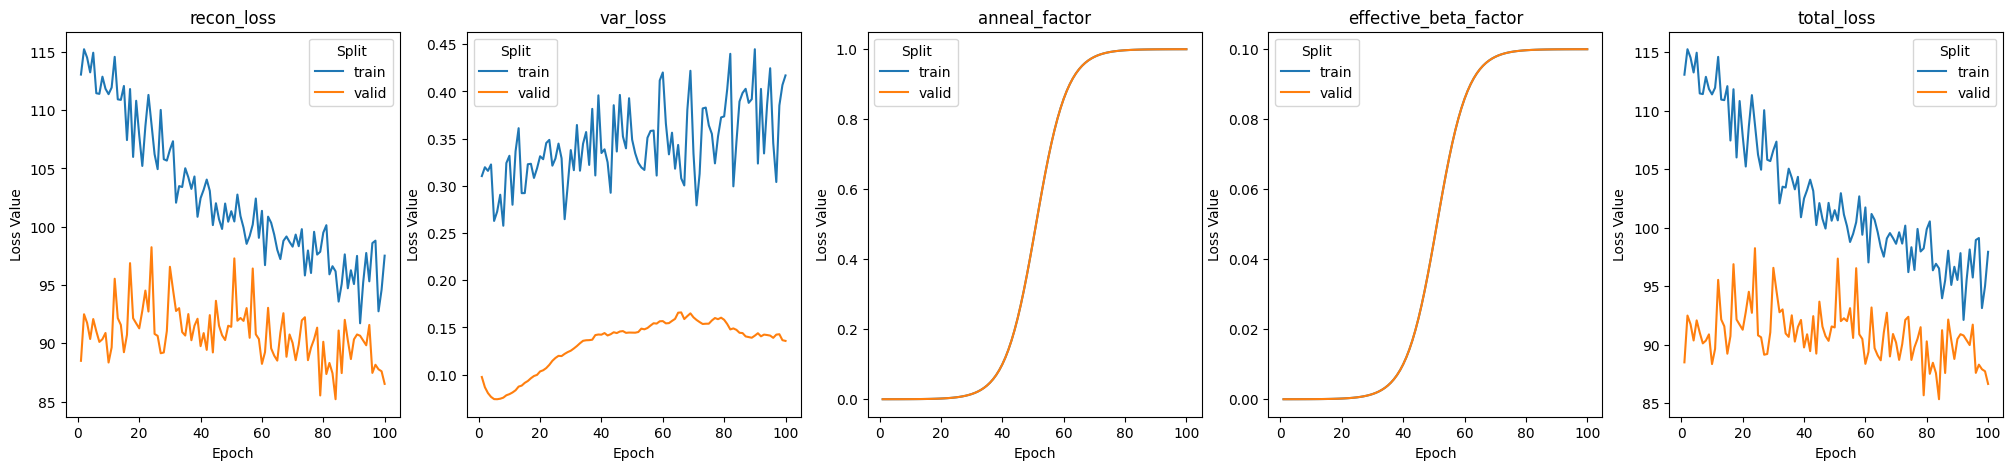

ValueError: No annotation data found. Please provide a valid annotation data type.

In [4]:
stackix.show_result()

In [5]:
xmodalix = acx.XModalix(config=config)

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_pipeline.py:181: UserWarning: Your config is of type: <class 'autoencodix.configs.stackix_config.StackixConfig'>, for this pipeline the default params of: <class 'autoencodix.configs.xmodalix_config.XModalixConfig'> work best
  warnings.warn(


In [6]:
results = stackix._trainer._orchestrator.modality_results

In [7]:
results["RNA"].sample_ids.get(epoch=-1, split="train")

array(['RESTING_002', 'RESTING_003', 'RESTING_004', 'RESTING_017',
       'RESTING_019', 'RESTING_020', 'RESTING_021', 'RESTING_024',
       'RESTING_026', 'RESTING_033', 'RESTING_042', 'RESTING_044',
       'RESTING_045', 'RESTING_046', 'RESTING_049', 'RESTING_051',
       'RESTING_054', 'RESTING_056', 'RESTING_057', 'RESTING_058',
       'RESTING_059', 'RESTING_061', 'RESTING_063', 'RESTING_087',
       'RESTING_088', 'RESTING_092', 'RESTING_094', 'RESTING_097',
       'RESTING_098', 'RESTING_100', 'RESTING_109', 'RESTING_111',
       'RESTING_113', 'RESTING_115', 'RESTING_116', 'RESTING_117',
       'RESTING_121', 'RESTING_123', 'RESTING_130', 'RESTING_135',
       'RESTING_138', 'RESTING_152', 'RESTING_154', 'RESTING_157',
       'RESTING_160', 'RESTING_163', 'RESTING_164', 'RESTING_168',
       'RESTING_169', 'RESTING_182', 'RESTING_183', 'RESTING_189',
       'RESTING_191', 'RESTING_192', 'RESTING_195', 'RESTING_196',
       'RESTING_197', 'RESTING_203', 'RESTING_204', 'RESTING_2

In [8]:
results["RNA"].reconstructions.get(epoch=-1)

{'train': array([[ 0.15489373,  0.34930676, -0.35049585, -0.2717259 ,  0.48038718],
        [ 0.19732618,  0.72244704,  0.391911  , -0.13917352,  0.30477187],
        [-0.03186771, -0.0752359 , -0.08400006,  0.11870649, -0.12032934],
        [ 0.28656393,  0.5874499 ,  0.22734989, -0.09289439, -0.02289021],
        [-0.89041466, -1.1902343 , -0.2553014 , -0.1858209 ,  0.3870222 ],
        [-1.6010227 , -2.0921981 ,  0.6632776 , -0.40313298,  0.27361533],
        [ 0.1683587 ,  0.23401813,  0.54679966,  0.38222596, -0.19542399],
        [ 0.26517075,  0.49559158, -0.24490418, -0.324649  , -0.3790178 ],
        [ 0.12184445, -0.32740304, -0.40593958,  0.45538822, -0.14710422],
        [ 0.5446663 ,  0.8295686 ,  0.4168322 ,  0.04278334, -0.3119615 ],
        [ 0.2059115 ,  0.48758328,  0.18687466, -0.03907197,  0.23070453],
        [-0.22353545, -0.64252925, -0.6485744 ,  0.5258544 , -0.74292076],
        [ 0.51862806,  0.9494219 , -0.5161283 , -0.6594951 ,  0.16198257],
        [ 0.0512

In [9]:
xmodalix.run()

preprocessing


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 56 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_005', 'RESTING_008', 'RESTING_012', 'RESTING_013', 'RESTING_014', 'RESTING_018', 'RESTING_027', 'RESTING_028', 'RESTING_029', 'RESTING_030', 'RESTING_031', 'RESTING_036', 'RESTING_040', 'RESTING_047', 'RESTING_050', 'RESTING_060', 'RESTING_062', 'RESTING_066', 'RESTING_067', 'RESTING_068', 'RESTING_090', 'RESTING_091', 'RESTING_106', 'RESTING_107', 'RESTING_112', 'RESTING_114', 'RESTING_119', 'RESTING_127', 'RESTING_128', 'RESTING_129', 'RESTING_137', 'RESTING_140', 'RESTING_141', 'RESTING_143', 'RESTING_146', 'RESTING_149', 'RESTING_158', 'RESTING_162', 'RESTING_171', 'RESTING_174', 'RESTING_179', 'RESTING_181', 'RESTING_184', 'RESTING_185', 'RESTING_187', 'RESTING_207', 'RESTING_215', 'RESTING_226', 'RESTING_236', 'RESTING_253', 'RESTING_262', 'RESTING_265', 'REST

bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'mutation', 'radiology', 'cell_deconvolution'])
--- Running Pairing-Aware Split ---
Identified 32 fully paired samples across all modalities.
Identified 91 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
key: train, type: <class 'dict'>
key: valid, type: <class 'dict'>
key: test, type: <class 'dict'>
Check if we need to pretrain: multi_bulk.RNA
pretrain epochs : 0
No pretraining for multi_bulk.RNA
Check if we need to pretrain: multi_bulk.mutation
pretrain epochs : 0
No pretraining for multi_bulk.mutation
Check if we need to pretrain: multi_bulk.radiology
pretrain epochs : 0
No pretraining for multi_bulk.radiology
Check if we need to pretrain: multi_bulk.cell_deconvolution
pretrain epochs : 0
No pretraining for multi_bulk.cell_deconvolution
--- Epoch 1/100 ---
split: train, n_samples: 887
Epoch 1/100 - Train Loss: 18.6550
split: valid, n_samples: 43
Epoch 1/10

ValueError: No modality with a 'from' direction was specified in the config.

In [ ]:

os.getcwd()